In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
fandangoDF=pd.read_csv('./fandango.csv')
fandangoDF.head()


,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

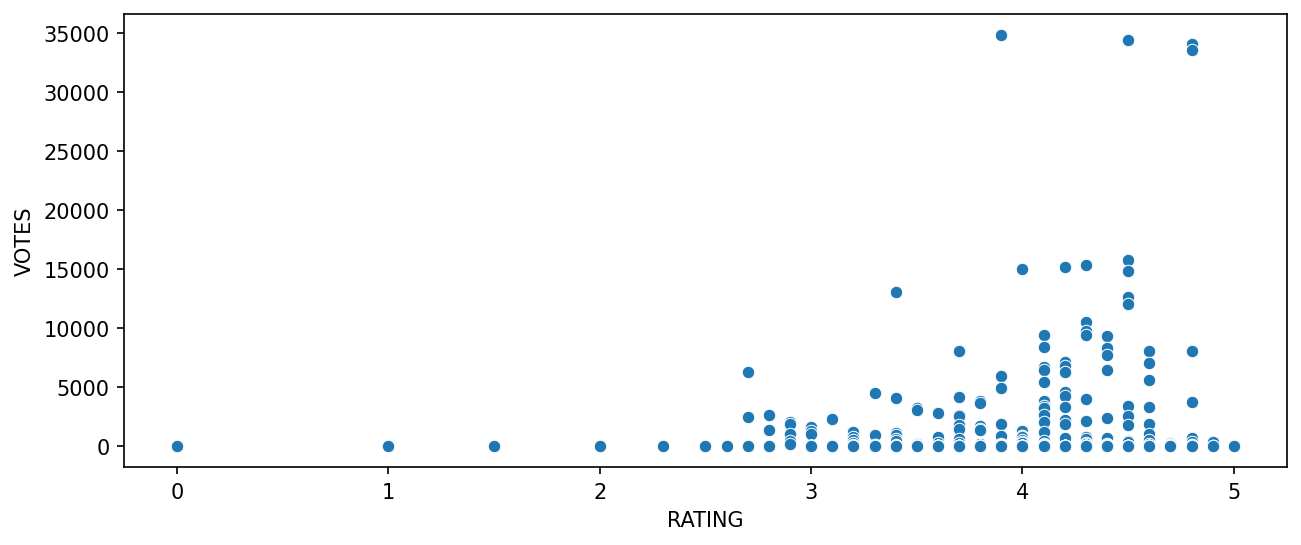

In [89]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandangoDF,y='VOTES',x='RATING')

In [90]:
fandangoDF['YEAR']=fandangoDF['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))


<AxesSubplot:xlabel='YEAR', ylabel='count'>

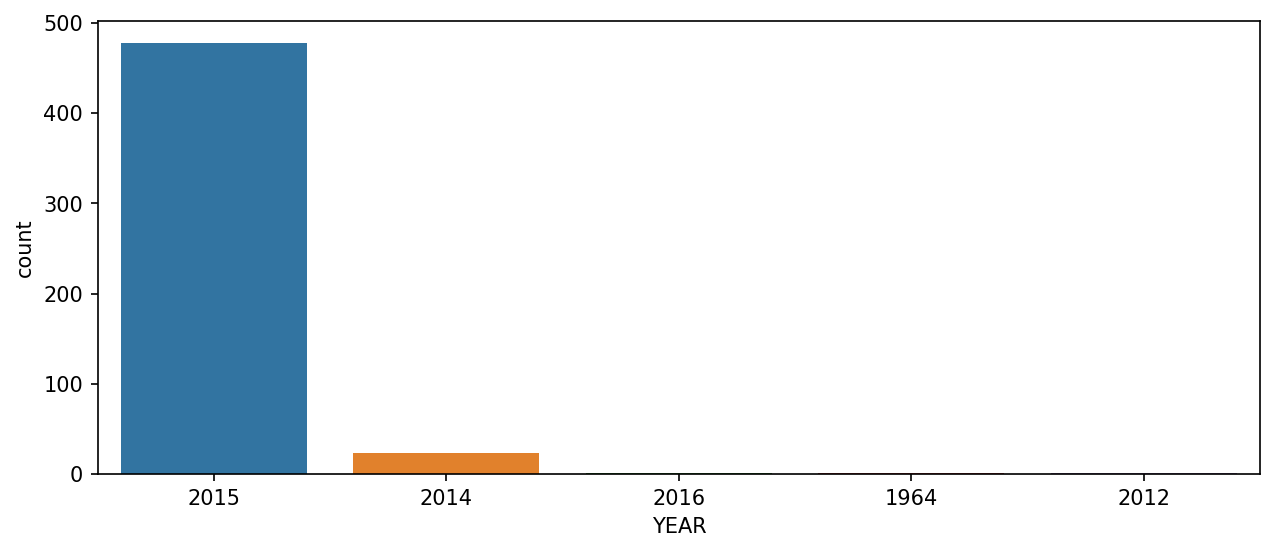

In [91]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=fandangoDF,x='YEAR')

In [92]:
fandangoDF.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [93]:
fandangoDF[fandangoDF['VOTES']==0].value_counts()

FILM                                             STARS  RATING  VOTES  YEAR
6 Years (2015)                                   0.0    0.0     0      2015    1
Our Man in Tehran (2015)                         0.0    0.0     0      2015    1
Selam Bahara Yolculuk (2015)                     0.0    0.0     0      2015    1
Searching For Home, Coming Back From War (2015)  0.0    0.0     0      2015    1
SDLFF: A Photographer's Journey (2015)           0.0    0.0     0      2015    1
                                                                              ..
La passion d'Augustine (2015)                    0.0    0.0     0      2015    1
Le gaucher (2015)                                0.0    0.0     0      2015    1
Le monde de demain (2015)                        0.0    0.0     0      2015    1
Le tireur (2015)                                 0.0    0.0     0      2015    1
Zarafa (2012)                                    0.0    0.0     0      2012    1
Length: 69, dtype: int64

In [94]:
fanReviewedMovies=fandangoDF[fandangoDF['VOTES']>0]

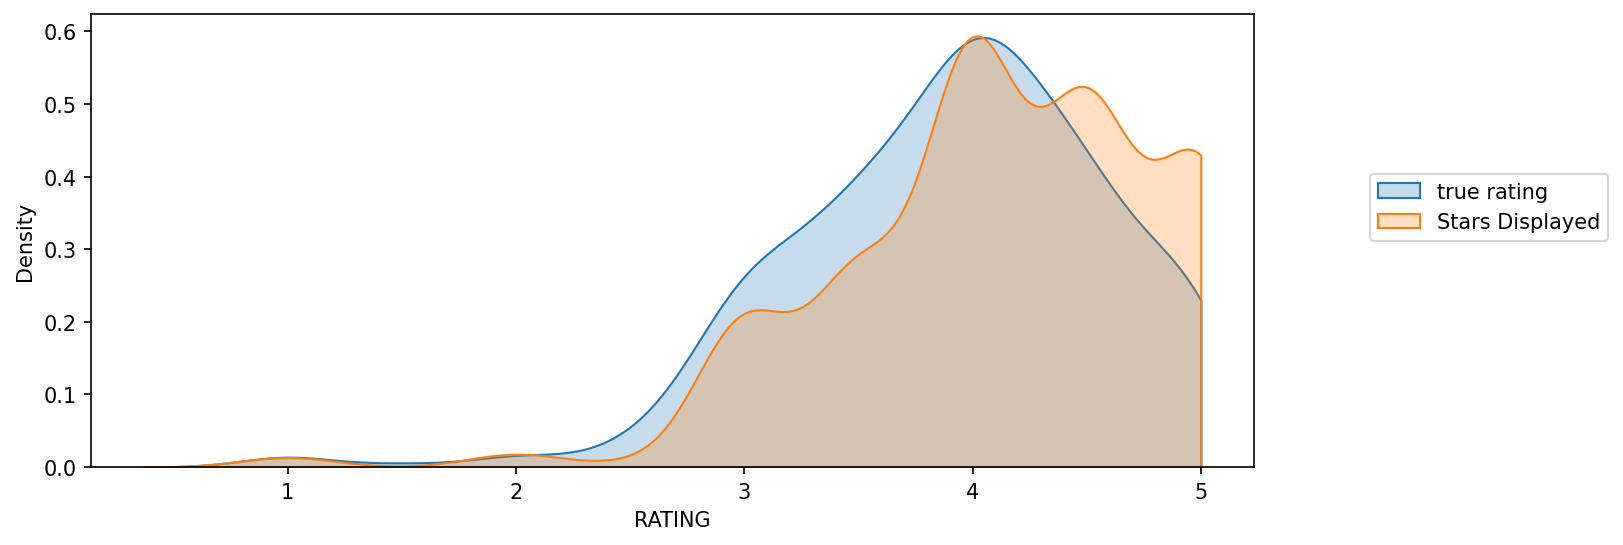

In [95]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fanReviewedMovies,x='RATING',fill=True,label='true rating',clip=[0,5])
sns.kdeplot(data=fanReviewedMovies,x='STARS',fill=True,label='Stars Displayed',clip=[0,5])
plt.legend(loc=(1.1,0.5))

In [ ]:
fanReviewedMovies['STAR DIFF']=(fanReviewedMovies['STARS']-fanReviewedMovies['RATING']).round(2)


<AxesSubplot:xlabel='STAR DIFF', ylabel='count'>

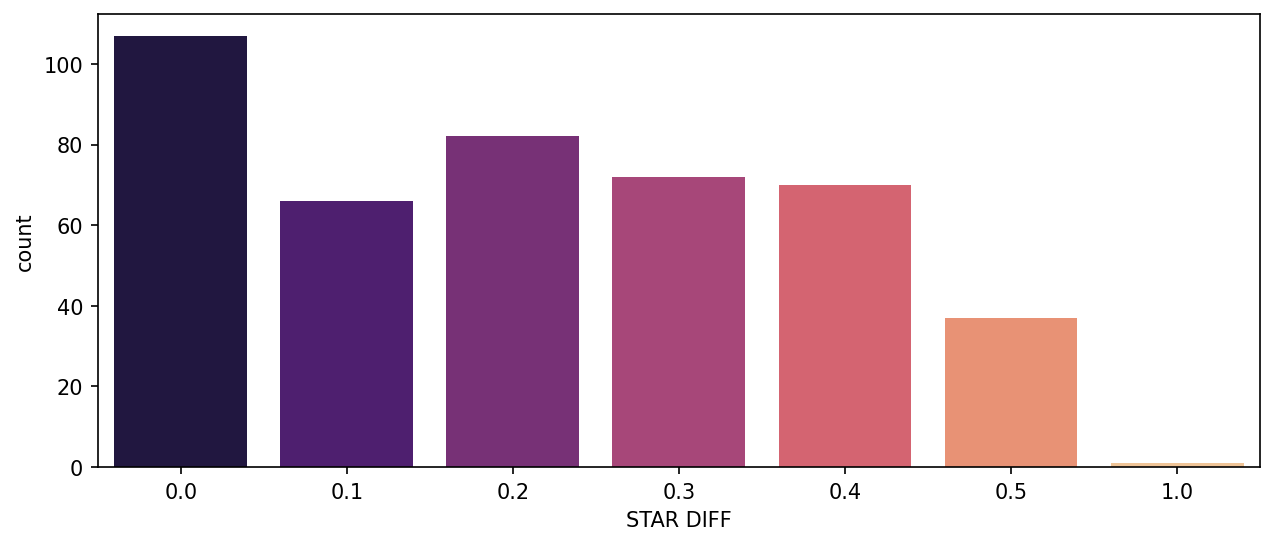

In [97]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=fanReviewedMovies,x='STAR DIFF',palette='magma')

In [98]:
fanReviewedMovies[fanReviewedMovies['STAR DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STAR DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [99]:
allSitesDF=pd.read_csv('./all_sites.csv')
allSitesDF


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


(0.0, 100.0)

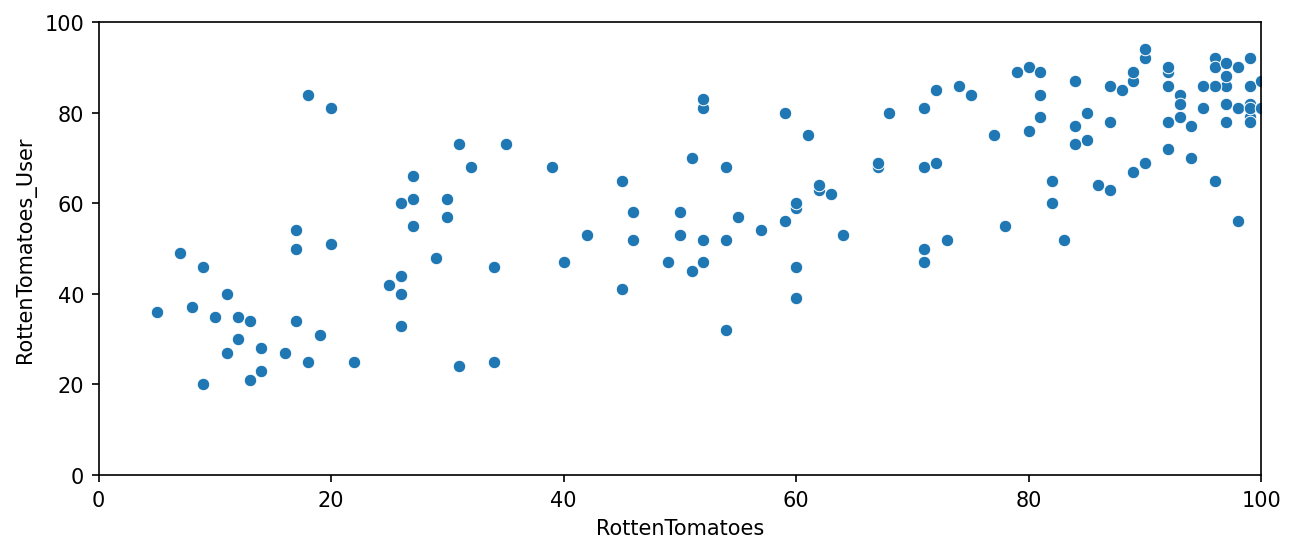

In [100]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=allSitesDF,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

In [101]:
allSitesDF['Rotten_Diff']  = (allSitesDF['RottenTomatoes'] - allSitesDF['RottenTomatoes_User'])
allSitesDF


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


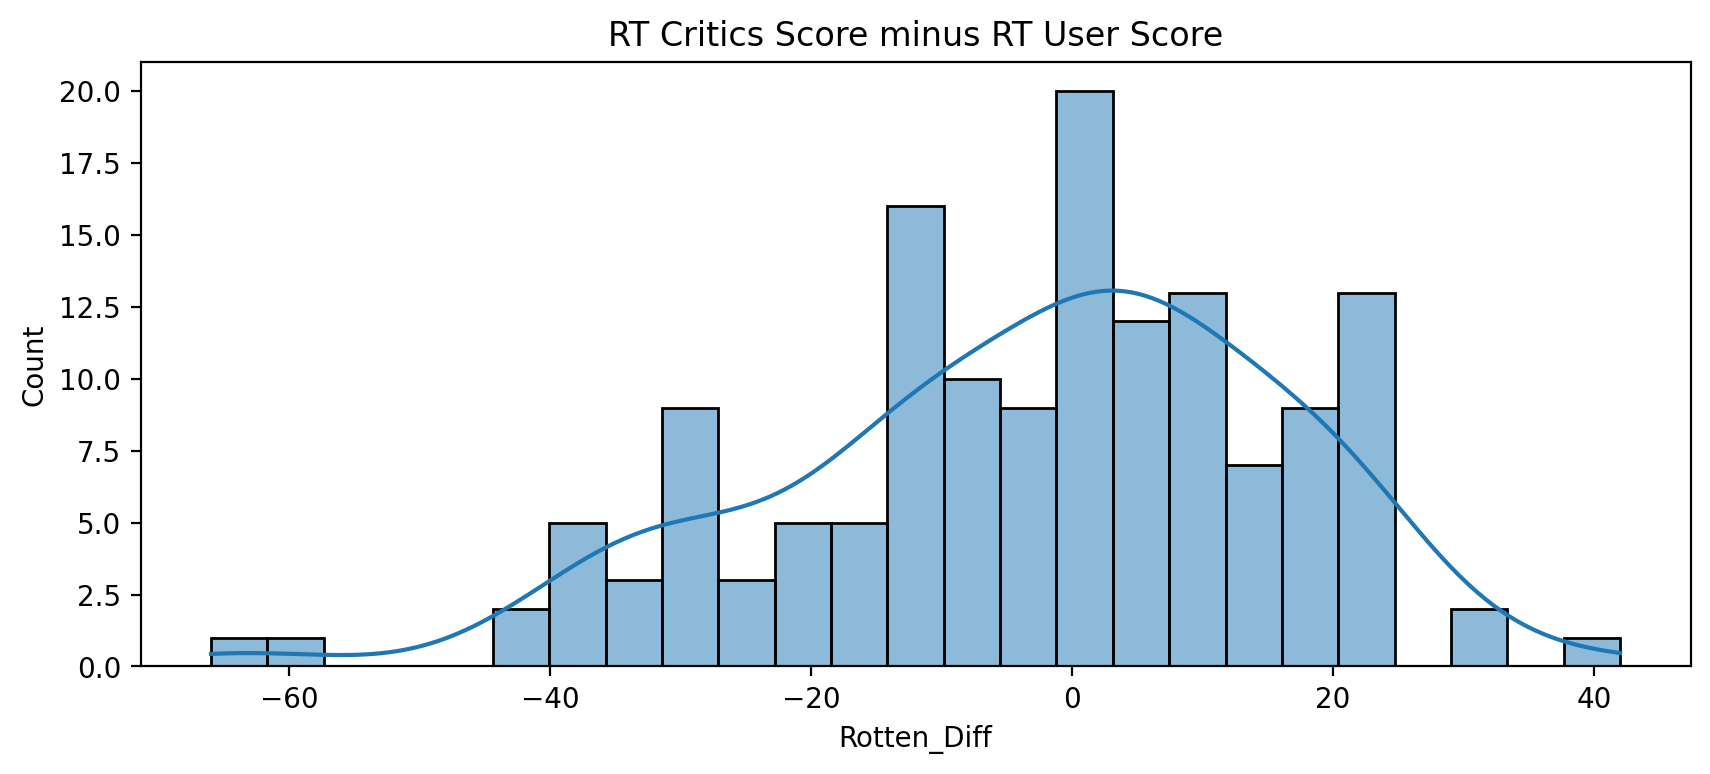

In [102]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=allSitesDF,x='Rotten_Diff',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

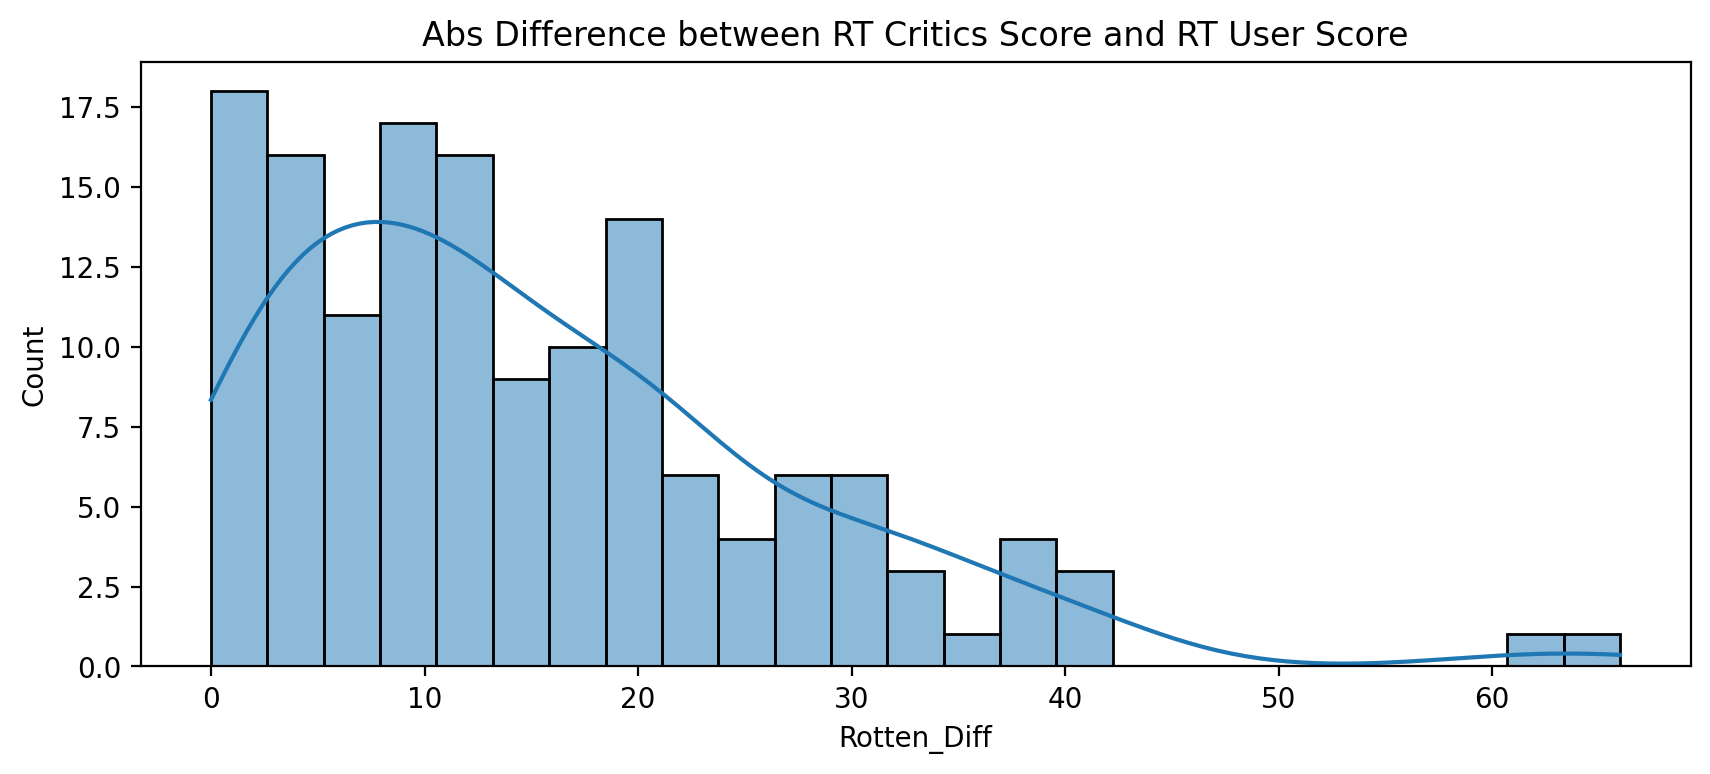

In [103]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=allSitesDF['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

In [104]:
print("Users Love but Critics Hate")
allSitesDF.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [105]:
print("Critics love, but Users Hate")
allSitesDF.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


(0.0, 10.0)

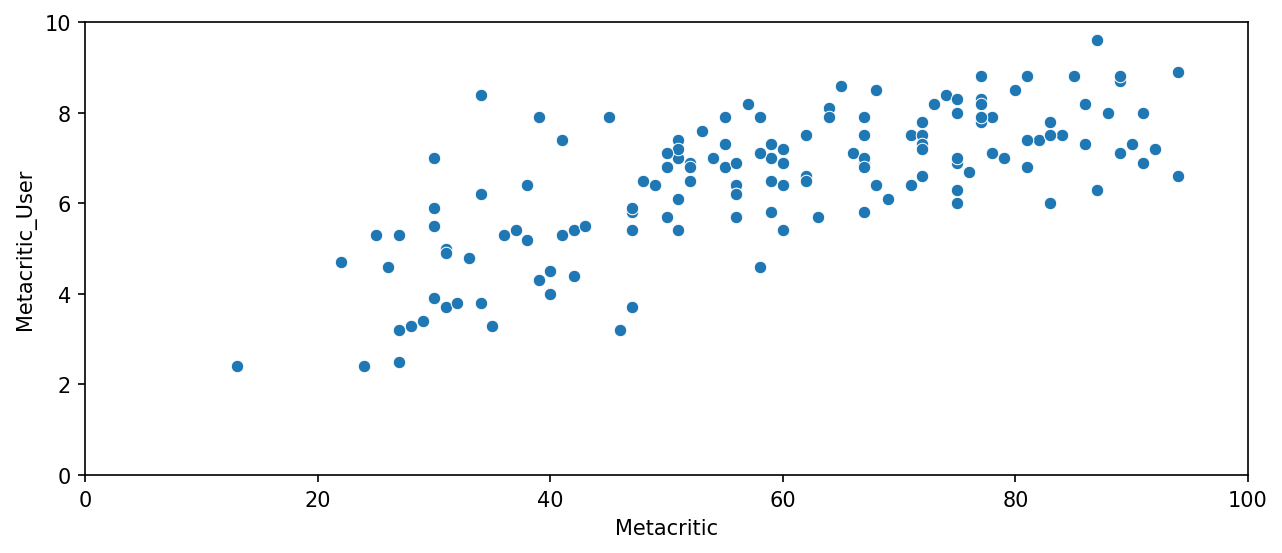

In [106]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=allSitesDF,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

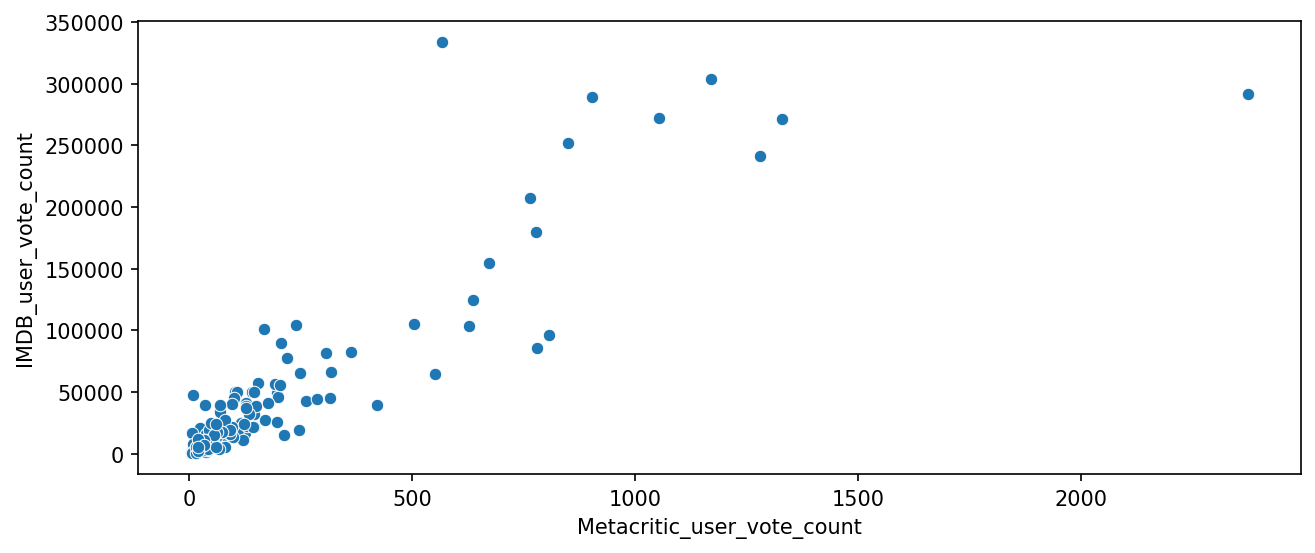

In [107]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=allSitesDF,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [108]:
allSitesDF.nlargest(1,'IMDB_user_vote_count')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [109]:
allSitesDF.nlargest(1,'Metacritic_user_vote_count')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9
